<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Plot-the-cost-and-stopping-criterion" data-toc-modified-id="Plot-the-cost-and-stopping-criterion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot the cost and stopping criterion</a></span></li><li><span><a href="#Understanding-the-bumps-by-reconstructing-the-history-of-total-cost" data-toc-modified-id="Understanding-the-bumps-by-reconstructing-the-history-of-total-cost-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Understanding the bumps by reconstructing the history of total cost</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Understanding-the-bumps-by-comparing-their-origin-with-the-two-different-stopping-criteria" data-toc-modified-id="Understanding-the-bumps-by-comparing-their-origin-with-the-two-different-stopping-criteria-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Understanding the bumps by comparing their origin with the two different stopping criteria</a></span><ul class="toc-item"><li><span><a href="#Printing-the-stopping-criterion-and-the-total-cost-at-each-outer-iteration-for-sc-=-Duality-Gap" data-toc-modified-id="Printing-the-stopping-criterion-and-the-total-cost-at-each-outer-iteration-for-sc-=-Duality-Gap-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Printing the stopping criterion and the total cost at each outer iteration for sc = Duality Gap</a></span></li><li><span><a href="#Printing-the-stopping-criterion-and-the-total-cost-at-each-outer-iteration-for-sc-=-relative-progress" data-toc-modified-id="Printing-the-stopping-criterion-and-the-total-cost-at-each-outer-iteration-for-sc-=-relative-progress-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Printing the stopping criterion and the total cost at each outer iteration for sc = relative progress</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

We have huge bumps for 25 nodes which prevents getting to the optimal point. How can we understand what is happening? 

# Conclusion

The takeaways from this short notebook are: 
- Bumps are present regardless of the stopping criterion we use (which is reassuring). Indeed, in the beginning, I thought it was only due to the RP stopping criterion. The only reason they were not noticed with the duality gap, is because it never reaches the tolerance (that is another question to explore later). 
- Bumps are generated by rebalancing edges. We can recreate the cost (and the bumps) from both inside and outside the computation. If you have a too low k or a too high assignment, you will create bumps. 

# Load

In [3]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from amod_ed.result_analysis import plot_ri, print_final_flows, plot_cost_all_path

import pandas as pd

from amod_ed.result_analysis import plot_stop_and_cost

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
n_nodes=25
subfolder='ni_comparison'

In [66]:
DATA_PATH = '/Users/lucasfuentes/ASL/ICU/notebooks/Data/'

path=os.path.join(DATA_PATH,str(n_nodes)+'Nodes/outputs/quals/','results_withBumps')

In [67]:
print(os.listdir(path))

['output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False.pkl']


In [70]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list = pickle.load(f)

output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False.pkl


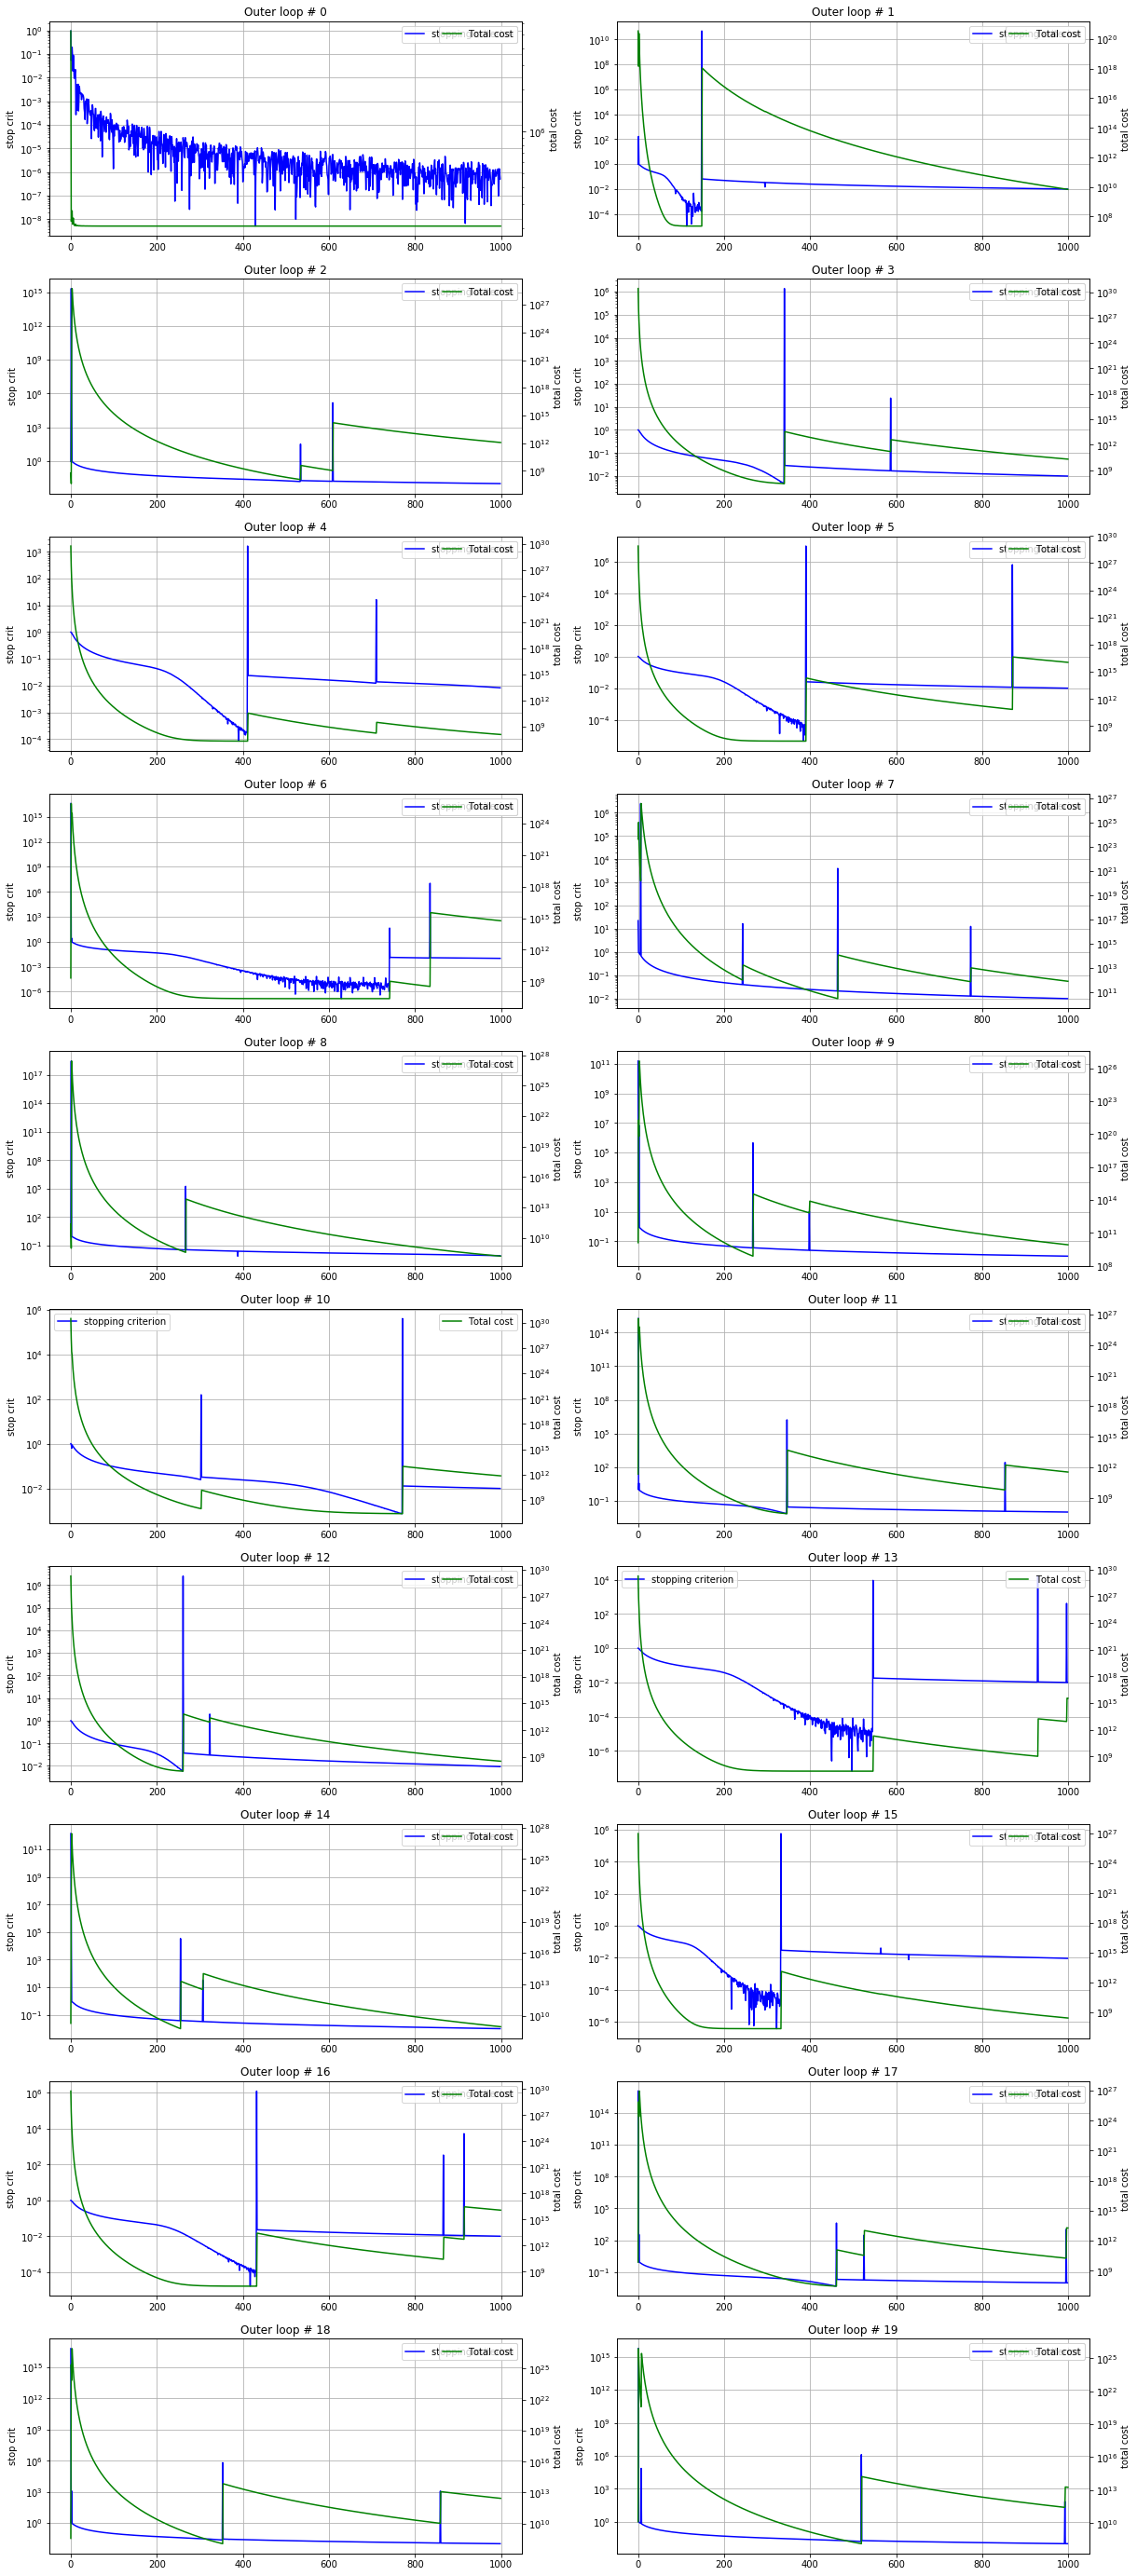

In [75]:
plot_stop_and_cost(opt_res)

In [76]:
ID=1

In [77]:
G_ref=G_FW[ID]
opt_ref = opt_res[ID]
ri_ref=ri_FW[ID]

# Plot the cost and stopping criterion

In [78]:
path

'/Users/lucasfuentes/ASL/ICU/notebooks/Data/25Nodes/outputs/quals/results_withBumps'

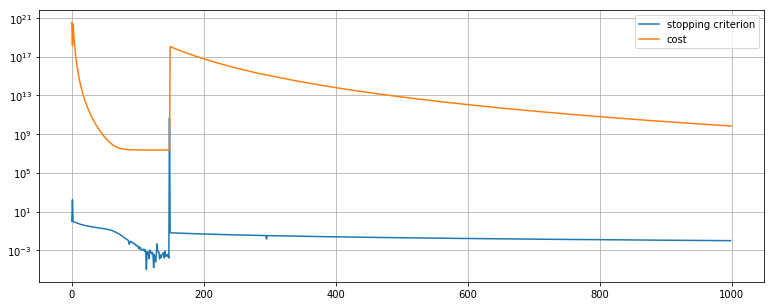

In [79]:
plt.figure(figsize=(13,5))
plt.plot(opt_ref['stop'], label='stopping criterion')
plt.grid()
plt.yscale('log')
plt.plot(opt_ref['obj'], label='cost')
plt.legend()

The cost gains 6 orders of magnitude... Wtf? 

In [86]:
lims=[140,160]

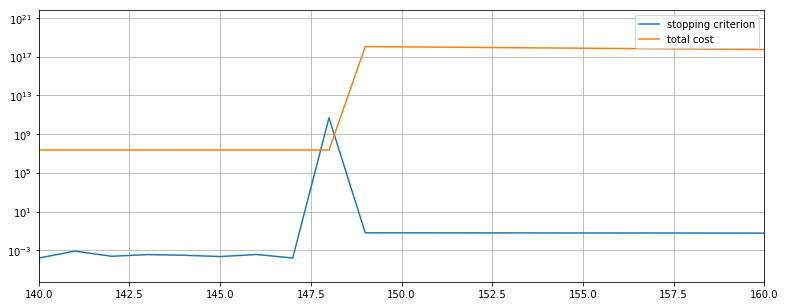

In [88]:
plt.figure(figsize=(13,5))
plt.plot(opt_ref['stop'], label="stopping criterion")
plt.grid()
plt.yscale('log')
plt.plot(opt_ref['obj'], label="total cost")
plt.xlim(lims)
plt.legend()

The cost increases by 8 orders of magnitude

# Understanding the bumps by reconstructing the history of total cost

In [89]:
from amod_ed.result_analysis import plot_edge_attrs

There are multiple shifts in the data and the way it is stored. 

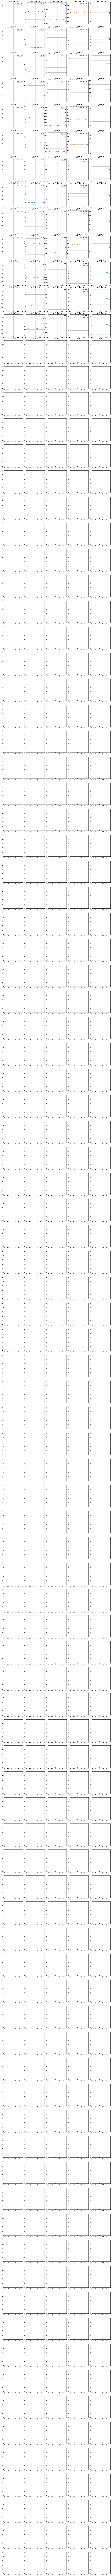

In [108]:
attrs=['f_m', 'f_r','cost','tot_cost','k']
tot_cost, tot_cost_2 = plot_edge_attrs(G_FW[ID+1],None,attrs,dots=False,lims=lims, ri_=ri_FW[ID+1], only_R=True)

In [91]:
#compare k and r
r_=[]
k_=[]
r_n=[]
node='16'
n=len(G_FW)
for i in range(1,n):
    G=G_FW[i][0]
    k_.append(G[node]['R']['k'])
    r_.append(ri_FW[i][node])
    r_n.append(G.nodes[node]['ri'])

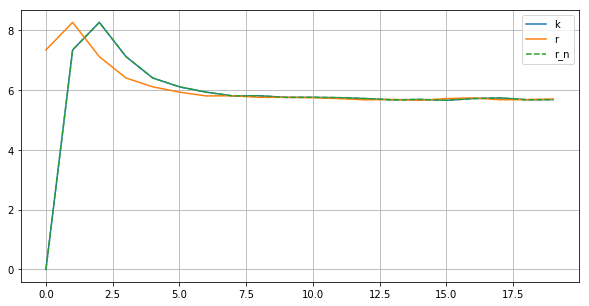

In [92]:
plt.figure(figsize=(10,5))
plt.plot(k_,label='k')
plt.plot(r_,label='r')
plt.plot(r_n,'--',label='r_n')
plt.grid()
plt.legend()

There is simply a shift by 1 iteration

We can reconstruct the cost perfectly -- therefore we account for the whole bumps

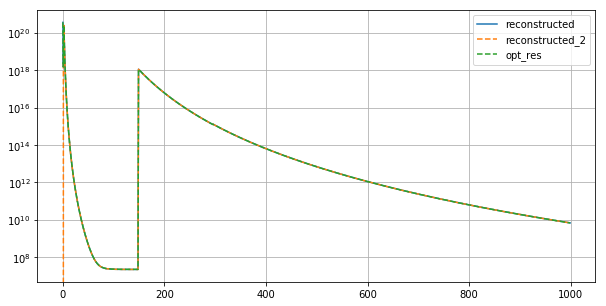

In [121]:
tot_cost_reconstructed=np.nansum(tot_cost,axis=0)

tot_cost_reconstructed_2=np.nansum(tot_cost_2,axis=0)

plt.figure(figsize=(10,5))
plt.plot(tot_cost_reconstructed,label='reconstructed')
plt.grid()
plt.plot(tot_cost_reconstructed_2, '--',label='reconstructed_2')
plt.plot(opt_res[1]['obj'],'--',label="opt_res")
plt.yscale('log')
plt.legend()
# plt.xlim([0,2])

## Conclusion

The rebalancing edges have such a huge cost that either
- too large assignment
- too low k

will create huge bumps in costs. 

# Understanding the bumps by comparing their origin with the two different stopping criteria

If we have bumps, we should have them with both stopping criteria. No reason that they would appear with one and not the other... 

In [27]:
n_nodes=25
subfolder='comparison_sc'

In [28]:
path_sc='Data/'+str(n_nodes)+'Nodes/outputs/rel_prog/'+subfolder

In [29]:
print(os.listdir(path_sc))

['.DS_Store', 'output_L_10000_ni_5000_no_10_ev_0_duality_gap.pkl', 'output_L_10000_ni_5000_no_10_ev_0_relative_progress.pkl']


## Printing the stopping criterion and the total cost at each outer iteration for sc = Duality Gap

In [31]:
filename=os.listdir(path_sc)[1]
print(filename)

with open(os.path.join(path_sc, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list = pickle.load(f)

output_L_10000_ni_5000_no_10_ev_0_duality_gap.pkl


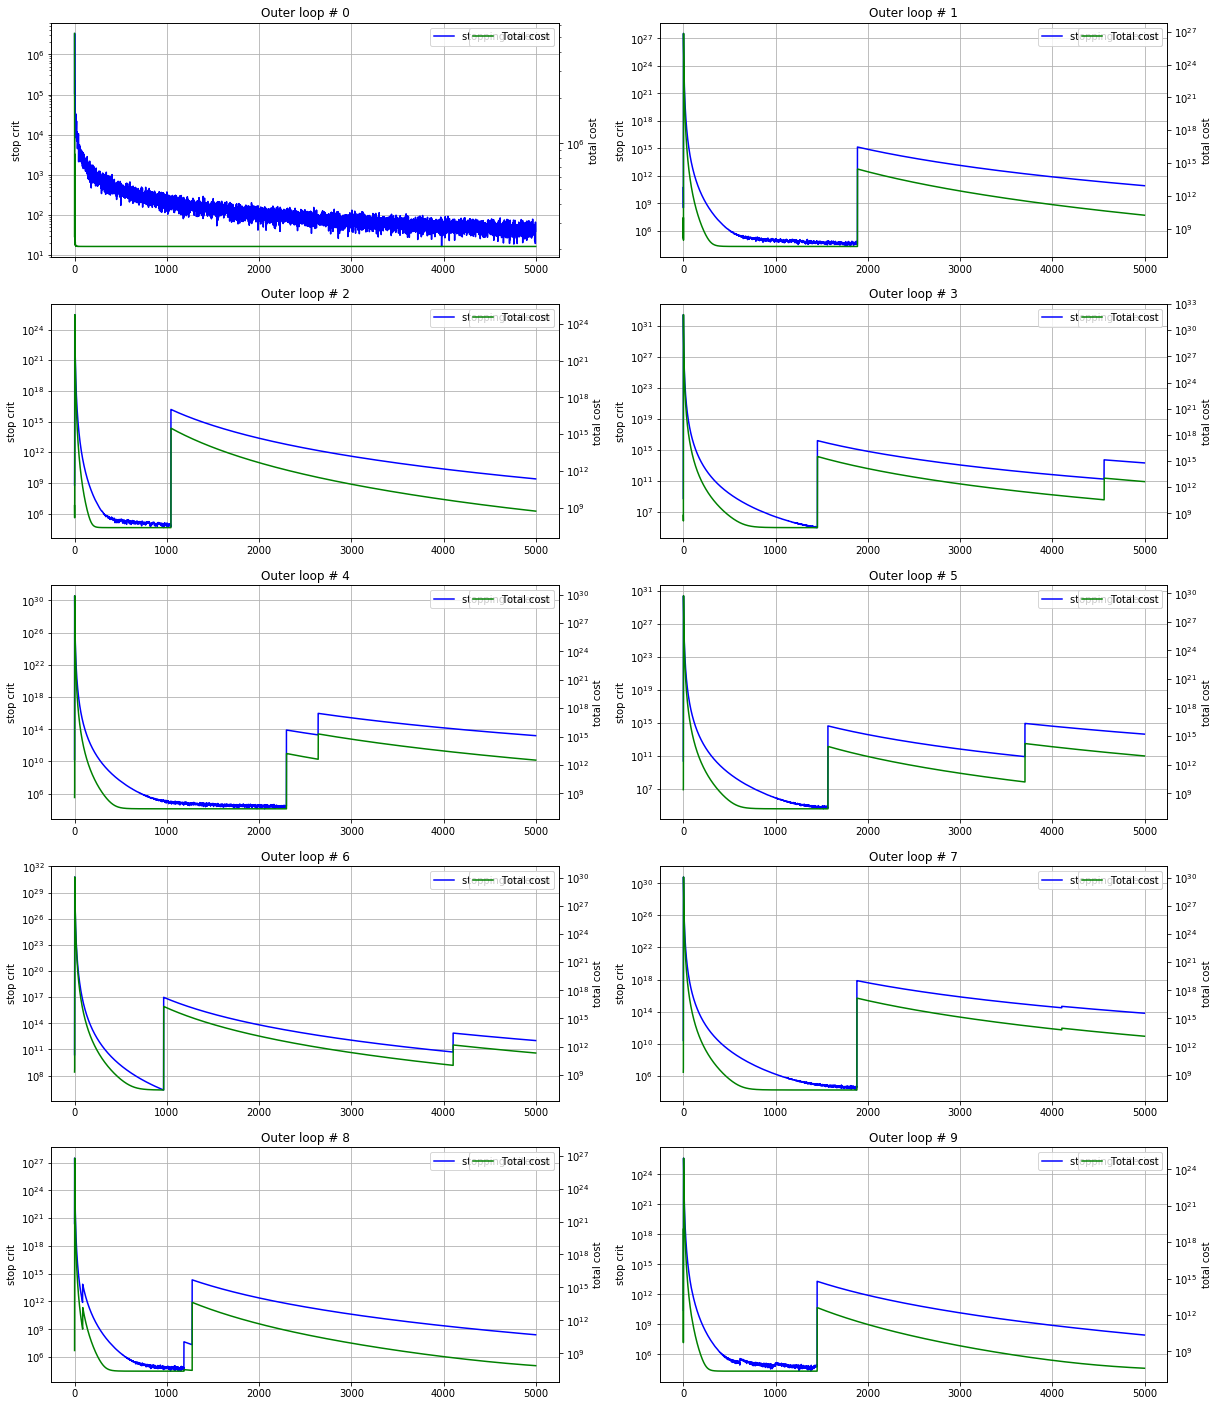

In [32]:
plot_stop_and_cost(opt_res)

## Printing the stopping criterion and the total cost at each outer iteration for sc = relative progress

In [33]:
filename=os.listdir(path_sc)[2]
print(filename)

with open(os.path.join(path_sc, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list = pickle.load(f)

output_L_10000_ni_5000_no_10_ev_0_relative_progress.pkl


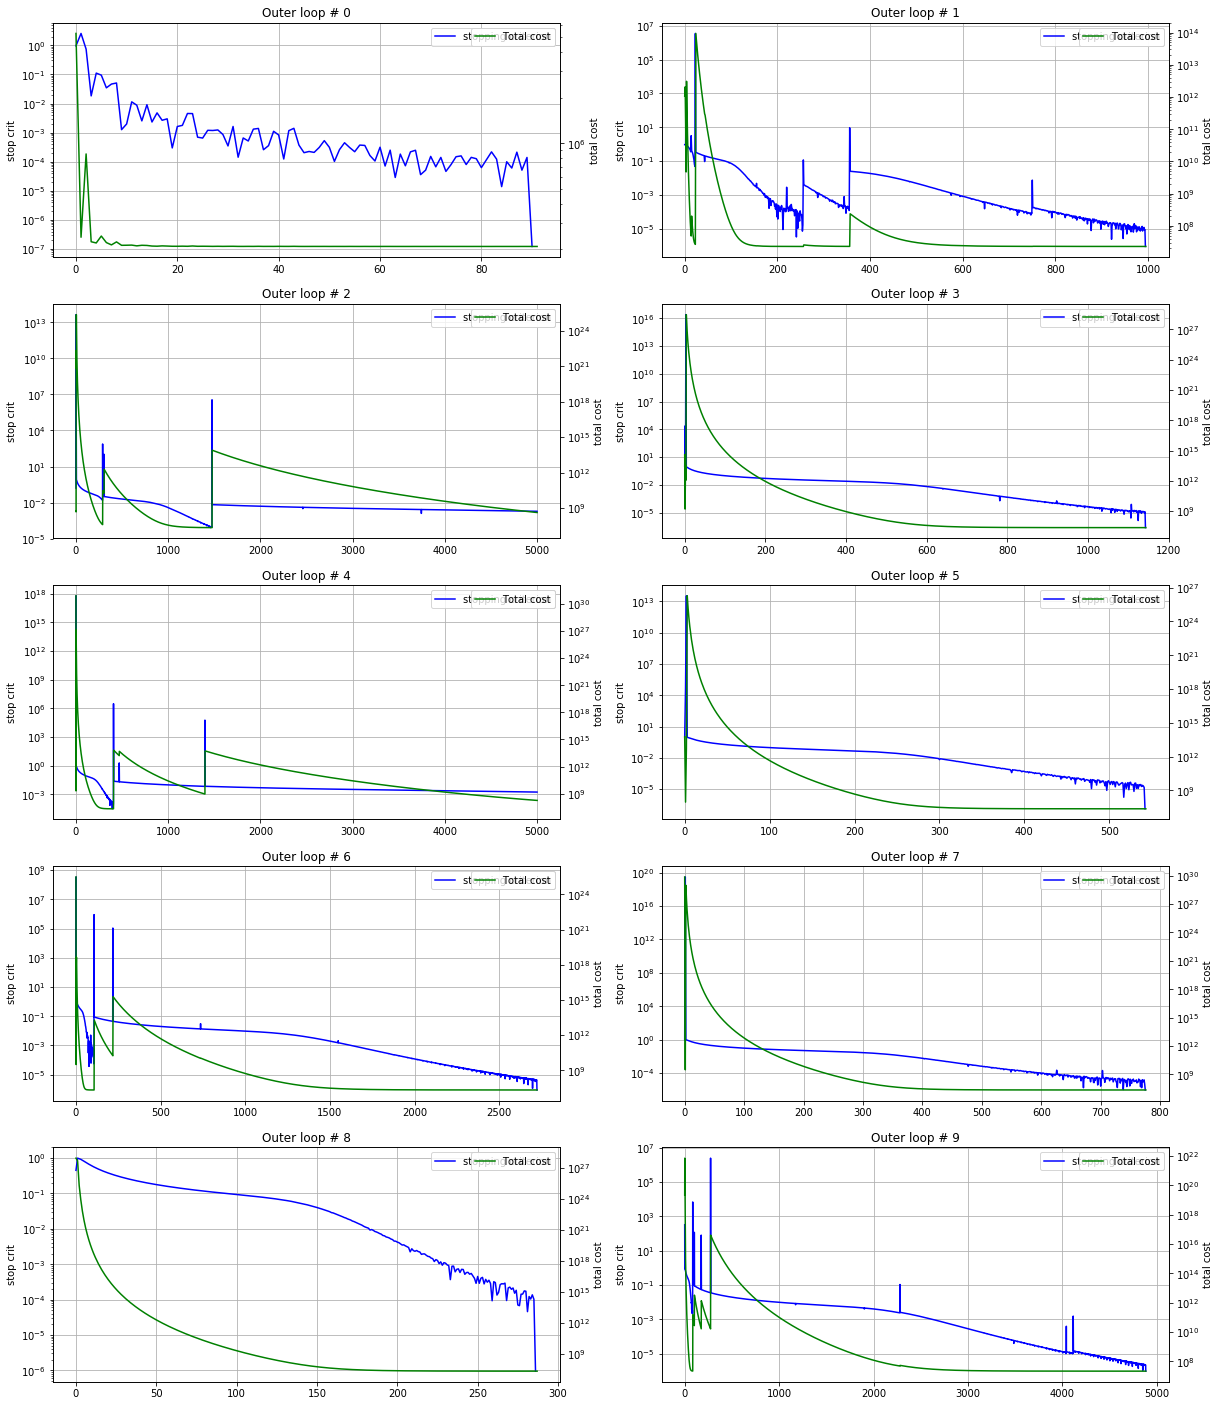

In [34]:
plot_stop_and_cost(opt_res)

## Conclusion

The bumps are present in both stopping criteria (which make sense). 

The reason why I though there were not bumps in the DG stopping criterion is because it seems to have steady decrease. The main reason is that we always run for the NI number of iterations (and therefore has more time to really decrease). 